In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
from numpy.polynomial import Chebyshev as T

%matplotlib inline

$u'' = f$ on $(-1,1)$

with $u(-1)=0$ and $u(1)=0$.

In [10]:
n = 20
nodes = np.linspace(-1, 1, n)
deg = n-1

def f(x):
    #return 0 * x
    return -np.pi**2 * np.sin(np.pi * x)

def phi(x, i):
    return T.basis(i)(x)

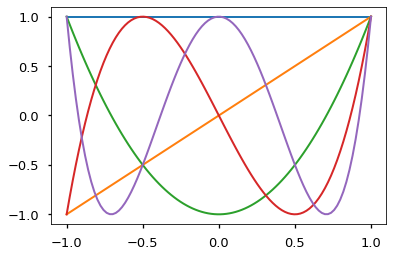

In [11]:
x = np.linspace(-1, 1, 100)
for i in range(5):
    plt.plot(x, phi(x, i), lw=2)

In [12]:
V = np.zeros((len(nodes), deg+1))
rhs = np.zeros(len(nodes))

for i in range(1,len(nodes)-1):
    # interior nodes
    for j in range(deg+1):
        V[i, j] = T.basis(j).deriv(2)(nodes[i])
        #V[i, j] += 1000 * (1 + nodes[i]**2) * T.basis(j)(nodes[i])
        
    rhs[i] = f(nodes[i])
    
for j in range(deg+1):
    V[0, j] = T.basis(j)(nodes[0])
    rhs[0] = 0
    
    V[-1, j] = T.basis(j)(nodes[-1])
    rhs[-1] = 0

In [13]:
c = np.linalg.solve(V, rhs)

In [14]:
u = 0 * x
for j in range(deg+1):
    u += c[j] * T.basis(j)(x)

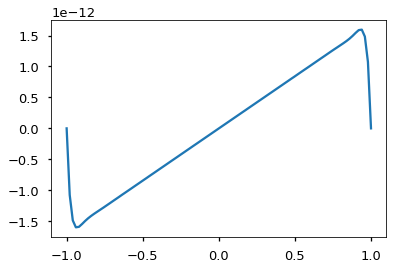

In [15]:
plt.plot(x, u - np.sin(np.pi * x))

In [16]:
c

array([-1.33226763e-15,  5.69230686e-01,  0.00000000e+00, -6.66916672e-01,
        3.78350418e-16,  1.04282369e-01,  3.12055129e-16, -6.84063354e-03,
        2.48070492e-16,  2.50006885e-04,  1.73709934e-16, -5.85024844e-06,
        1.13772621e-16,  9.53476510e-08,  5.92853057e-17, -1.14567575e-09,
        2.29446799e-17,  1.05602632e-11,  6.49616595e-18, -8.09313660e-14])